# Interpolation and Extrapolation with `CensusTimeSeries`

The `CensusTimeSeries` class has a built in static method that allows users to interpolate time series data into daily or monthly values and to extrapolate data. Because the `CensusTimeSeries` returns pandas dataframe data we can easily store that data as a csv file and reload it for interpolation, extrapolation, or other data manipulation.

### This notebook will go over:
   * A quick `CensusTimeSeries` example (See notebook 3 for complete examples)
   * Saving and loading dataframe output from `CensusTimeSeries`
   * Using built in interpolation and extrapolation methods

In [1]:
from censusdc.utils import CensusTimeSeries
import pandas as pd
import os
import shapefile
import matplotlib.pyplot as plt

## `CensusTimeSeries` example

Let's load up our Sacramento area example and grab a timeseries excluding the Census ACS1 years 2005 through 2009.

<p align="center">
  <img src="https://raw.githubusercontent.com/jlarsen-usgs/census-data-collector/master/data/Sacramento_large.png" alt="Sacto_lrg"/>
</p>

In [2]:
# load personal census apikey
apikey = os.path.join("..", "api_key.dat")
with open(apikey) as foo:
    apikey = foo.readline().strip()

# point path to shapefile and instantiate CensusTimeSeries
shp_file = os.path.join('..', 'data', 'Sacramento_large_WGS.shp')
ts = CensusTimeSeries(shp_file, apikey)


# open shapefile and get our intersection polygon
shp = shapefile.Reader(shp_file)
polygon = shp.shape(0)

# get timeseries data
df = ts.get_timeseries(0, polygons=polygon, multithread=True, thread_pool=8)
df

Getting Tigerline data for census year 2000
Getting data for census year 2000
Getting Tigerline data for census year 2005
Getting data for census year 2005
Getting Tigerline data for census year 2006
Getting data for census year 2006
Getting Tigerline data for census year 2007
Getting data for census year 2007
Getting Tigerline data for census year 2008
Getting data for census year 2008
Getting Tigerline data for census year 2009
Getting data for census year 2009
Getting Tigerline data for census year 2010
Getting data for census year 2010
Getting Tigerline data for census year 2011
Getting data for census year 2011
Getting Tigerline data for census year 2012
Getting data for census year 2012
Getting Tigerline data for census year 2013
Getting data for census year 2013
Getting Tigerline data for census year 2014
Getting data for census year 2014
Getting Tigerline data for census year 2015
Getting data for census year 2015
Getting Tigerline data for census year 2016
Getting data for cen

,year,population,P052001,P052002,P052003,P052004,P052005,P052006,P052007,P052008,...,h_age_2000_2004,h_age_1990_1999,h_age_1980_1989,h_age_1970_1979,h_age_1960_1969,h_age_1950_1959,h_age_1940_1949,h_age_older_1939,median_h_year,gini
0,2000,572455.855780,220887.372179,18612.2202,13737.458319,13721.307004,15066.965987,15506.631529,15915.639546,14542.635096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,227428.713965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9137.586357,11658.416860,16998.357184,20069.834469,10999.023948,11276.680690,4190.433956,4752.692529,1.980667e+03,NaN
2,2006,233743.862294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9595.127841,11985.639874,16517.505985,18800.177102,11931.777720,11772.588804,4729.353431,4442.003808,1.980667e+03,NaN
3,2007,235832.750628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10081.734498,11128.375842,15786.284011,19032.327940,11986.718170,12105.433007,4292.815181,5096.558308,1.981333e+03,NaN
4,2008,237114.644902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10253.727840,11710.558636,14912.173627,18998.127221,11975.521636,11736.589505,4592.894562,4978.519025,1.981667e+03,NaN
5,2009,670550.211566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19823.389551,17379.347256,42911.627237,65785.744508,43803.268771,49822.498489,18400.733094,20258.950120,1.974533e+03,NaN
6,2010,793712.633866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19713.484655,24564.576451,46831.784606,76504.799194,52701.202376,62322.667514,23937.121455,25502.341648,1.970597e+03,0.394918
7,2011,796797.471233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19458.783963,24033.262221,46093.724848,76576.850618,52452.439737,62392.043929,23678.908971,25438.582821,-1.430422e+07,0.398660
8,2012,803230.884813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31738.099377,24182.846542,46151.104802,75452.199297,52075.810717,61326.225302,23744.014519,24917.452796,-2.574918e+07,0.406386
9,2013,809712.207542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31332.864928,24223.600241,47956.247390,75248.993308,51520.360696,61562.026834,23660.555977,24379.596825,-8.581745e+06,0.414494


### Saving a dataframe from a `CensusTimeSeries` data pull

Because output from the `CensusTimeSeries` data pull is a pandas Dataframe, we can use the built in method `df.to_csv()` to save a csv of the output which can prevent us from making the same data pull multiple times.

In [3]:
csv_name = os.path.join("..", 'data', "Sacramento_large.csv")

df.to_csv(csv_name, index=False)

### Loading `CensusTimeSeries` data from a saved csv

We can load saved `CensusTimeSeries` data directly into a pandas Dataframe using `pd.read_csv`

In [4]:
df2 = pd.read_csv(csv_name)
df2

,year,population,P052001,P052002,P052003,P052004,P052005,P052006,P052007,P052008,...,h_age_2000_2004,h_age_1990_1999,h_age_1980_1989,h_age_1970_1979,h_age_1960_1969,h_age_1950_1959,h_age_1940_1949,h_age_older_1939,median_h_year,gini
0,2000,572455.855780,220887.372179,18612.2202,13737.458319,13721.307004,15066.965987,15506.631529,15915.639546,14542.635096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,227428.713965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9137.586357,11658.416860,16998.357184,20069.834469,10999.023948,11276.680690,4190.433956,4752.692529,1.980667e+03,NaN
2,2006,233743.862294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9595.127841,11985.639874,16517.505985,18800.177102,11931.777720,11772.588804,4729.353431,4442.003808,1.980667e+03,NaN
3,2007,235832.750628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10081.734498,11128.375842,15786.284011,19032.327940,11986.718170,12105.433007,4292.815181,5096.558308,1.981333e+03,NaN
4,2008,237114.644902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10253.727840,11710.558636,14912.173627,18998.127221,11975.521636,11736.589505,4592.894562,4978.519025,1.981667e+03,NaN
5,2009,670550.211566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19823.389551,17379.347256,42911.627237,65785.744508,43803.268771,49822.498489,18400.733094,20258.950120,1.974533e+03,NaN
6,2010,793712.633866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19713.484655,24564.576451,46831.784606,76504.799194,52701.202376,62322.667514,23937.121455,25502.341648,1.970597e+03,0.394918
7,2011,796797.471233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19458.783963,24033.262221,46093.724848,76576.850618,52452.439737,62392.043929,23678.908971,25438.582821,-1.430422e+07,0.398660
8,2012,803230.884813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31738.099377,24182.846542,46151.104802,75452.199297,52075.810717,61326.225302,23744.014519,24917.452796,-2.574918e+07,0.406386
9,2013,809712.207542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31332.864928,24223.600241,47956.247390,75248.993308,51520.360696,61562.026834,23660.555977,24379.596825,-8.581745e+06,0.414494


## Performing interpolation and extrapolation on a `CensusTimeSeries` data set

The `CensusTimeSeries` class has a static method, `interpolate()` that allows the user to perform either daily or monthly interpolation on a data set.

The `interpolate()` method assumes that yearly data that is input to it was collected in the middle of the year (July 1st during normal years and July 2nd for leap years).

The `interpolate()` method has several parameters, many of which are optional:
   * `df` : pandas Dataframe of CensusTimeSeries data
   * `skip_years` : tuple of years to drop from the interpolation (optional)
   * `drop` : list of columns to drop from the interpolation (optional)
   * `discretization` : either 'daily' or 'monthly'. Default is 'daily'
   * `kind` : scipy.interpolate kind string. Specifies the kind of interpolation as a string (‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, ‘next’, where ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of zeroth, first, second or third order; ‘previous’ and ‘next’ simply return the previous or next value of the point) or as an integer specifying the order of the spline interpolator to use. Default is ‘linear’.
   * `min_extrapolate` : minimum year to extrapolate data past the bounds of the census df data (optional)
   * `max_extrapolate` : maximum year to extrapolate data past the bounds of the census df data (optional)

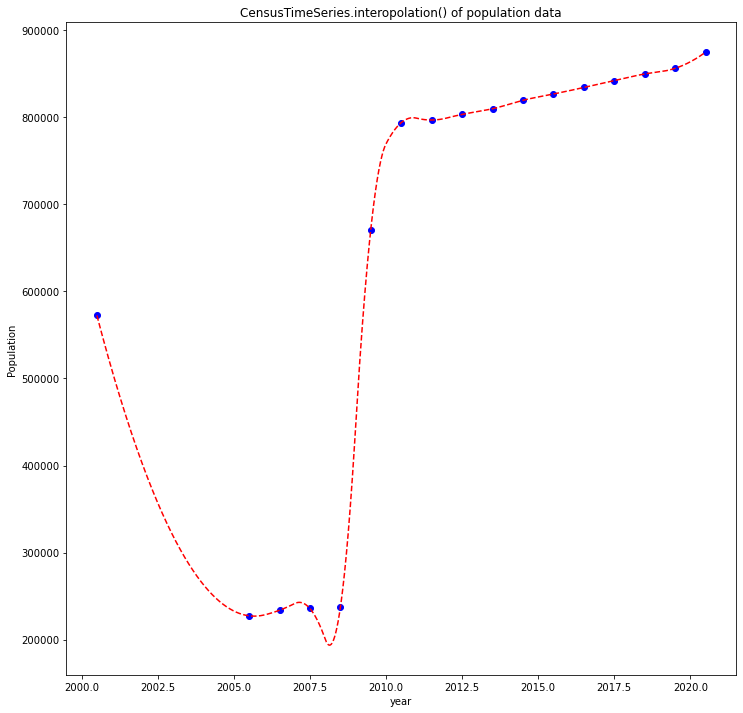

In [5]:
# Basic example of interpolation

dfint = CensusTimeSeries.interpolate(df2, kind='quadratic')

# offset the year values from the original dataframe for plotting purposes
dyears = df2.year.values + 0.5

# plot the output for visualization
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('CensusTimeSeries.interopolation() of population data')
ax.set_ylabel("Population")
ax.set_xlabel("year")
ax.plot(dyears, df2.population, "bo")
ax.plot(dfint.dyear, dfint.population, "r--");

As we can see there are some outliers in the data in years 2005 through 2009. Let's exclude these Acs1 data from our interpolation

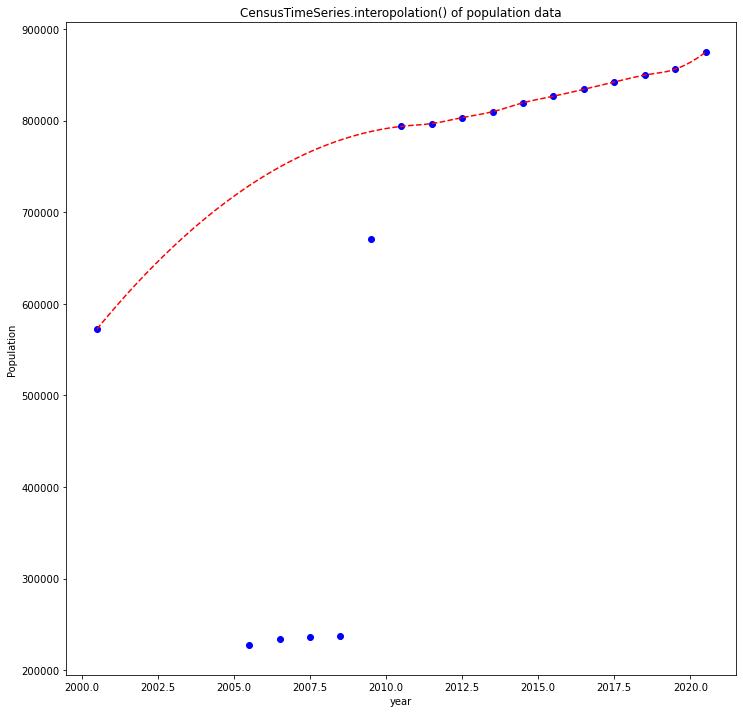

In [6]:
dfint = CensusTimeSeries.interpolate(df2, kind='quadratic', 
                                     skip_years=(2005, 2006, 2007, 2008, 2009))

# visualize the results
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('CensusTimeSeries.interopolation() of population data')
ax.set_ylabel("Population")
ax.set_xlabel("year")
ax.plot(dyears, df2.population, "bo")
ax.plot(dfint.dyear, dfint.population, "r--");

Now let's extrapolate our data out to 2025 using the `max_extrapolate` parameter

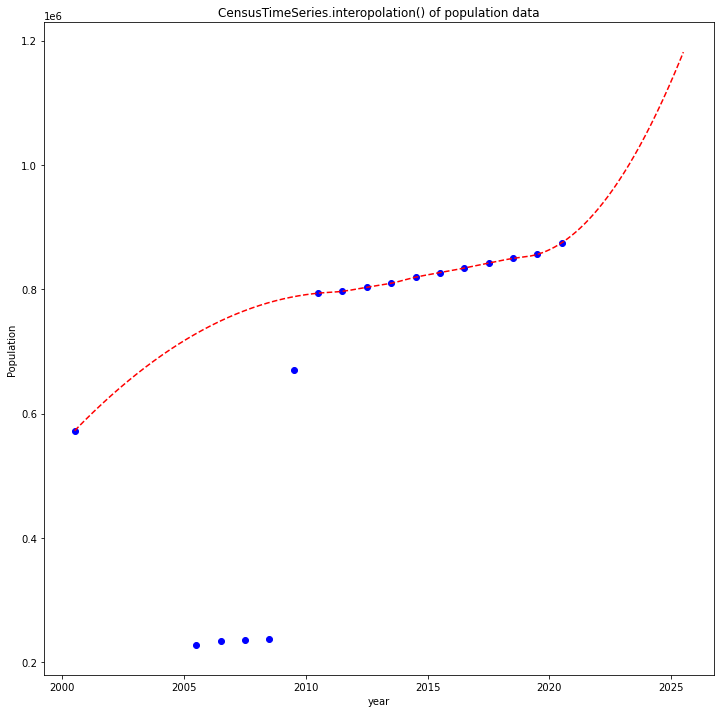

In [7]:
dfint = CensusTimeSeries.interpolate(df2, kind='quadratic', 
                                     skip_years=(2005, 2006, 2007, 2008, 2009),
                                     max_extrapolate=2025)

# Visualize the results
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('CensusTimeSeries.interopolation() of population data')
ax.set_ylabel("Population")
ax.set_xlabel("year")
ax.plot(dyears, df2.population, "bo")
ax.plot(dfint.dyear, dfint.population, "r--");

### We can save our extrapolated data as a csv for use in other applications

In [8]:
csv = os.path.join('..', 'data', 'Sacramento_large_extrapolated.csv')

dfint.to_csv(csv, index=False)